## Restaurant Recommender
Sept 2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('last_2_years_restaurant_reviews.csv')
df.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,name,categories,avg_stars
0,--9e1ONYQuAa-CB_Rrw7Tw,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0
1,--9e1ONYQuAa-CB_Rrw7Tw,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0


#### Select relevant columns in the original dataframe

In [3]:
# Get business_id, user_id, stars for recommender
df_stars = df[['business_id', 'user_id', 'stars']]    # 474K rows
df_stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400119 entries, 0 to 400118
Data columns (total 3 columns):
business_id    400119 non-null object
user_id        400119 non-null object
stars          400119 non-null int64
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


In [4]:
# Stars Distribution
df_stars['stars'].value_counts()

5    186549
4     84037
1     52389
3     44002
2     33142
Name: stars, dtype: int64

In [5]:
# number of unique business_id and unique user_id
df_stars['business_id'].nunique(), df_stars['user_id'].nunique()

(5783, 178770)

In [6]:
# user comment counts
df_user_counts = df_stars['user_id'].value_counts()
df_user_counts.head()

bLbSNkLggFnqwNNzzq-Ijw    590
JaqcCU3nxReTW2cBLHounA    312
B1829_hxXSEpDPEDJtYeIw    223
PKEzKWv_FktMm2mGPjwd0Q    211
3nIuSCZk5f_2WWYMLN7h3w    204
Name: user_id, dtype: int64

(array([  1.15257000e+05,   0.00000000e+00,   0.00000000e+00,
          2.90020000e+04,   0.00000000e+00,   1.25840000e+04,
          6.71100000e+03,   3.97900000e+03,   2.60400000e+03,
          3.06000000e+03,   1.64700000e+03,   9.80000000e+02,
          8.64000000e+02,   6.20000000e+02,   4.44000000e+02,
          3.38000000e+02,   2.29000000e+02,   1.45000000e+02,
          1.19000000e+02,   8.60000000e+01,   4.50000000e+01,
          3.20000000e+01,   1.10000000e+01,   5.00000000e+00,
          3.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([ 0.        ,  0.21267075,  0.4253415 ,  0.63801225,  0.850683  ,
         1.06335376,  1.27602451,  1.48869526,  1.70136601,  1.91403676,
         2.12670751,  2.33937826,  2.55204901,  2.76471977,  2.97739052,
         3.19006127,  3.40273202,  3.61540277,  3.82807352,  4.04074427,
         4.25341502,  4.46608578,  4.67875653,  4.89142728,  5.10409803,
         5.31

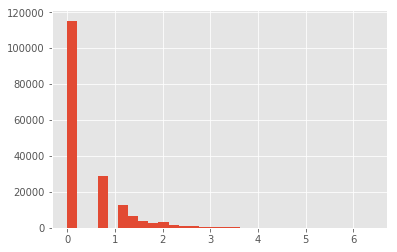

In [7]:
# Plot the histogram of comments
plt.hist(df_user_counts.apply(np.log), bins = 30)

In [8]:
# users that only commented once
df_user_counts[df_user_counts == 1].sum()

115257

In [9]:
# Define users who commented more than 5 times as active user
df_active_users = df_user_counts[df_user_counts > 5]

# number of active users
df_active_users.index.nunique()   # same as: df_active_users.count()

11237

In [10]:
# Find the active users in the df_stars dataframe
df_stars.set_index('user_id').ix[df_active_users.index].head()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,business_id,stars
user_id,,
bLbSNkLggFnqwNNzzq-Ijw,-95mbLJsa0CxXhpaNL4LvA,3
bLbSNkLggFnqwNNzzq-Ijw,-C8sSrFqaCxp51pyo-fQLQ,4
bLbSNkLggFnqwNNzzq-Ijw,-CQokjildrY7UZezXCdEBw,5
bLbSNkLggFnqwNNzzq-Ijw,-FcZY7a7qgxTUlTvwuyJnQ,3
bLbSNkLggFnqwNNzzq-Ijw,-IWsoxH7mLJTTpU5MmWY4w,4


In [11]:
# Filter the df_stars and keep only the active users records
df_stars_cleaned = df_stars.set_index('user_id').ix[df_active_users.index].reset_index()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [12]:
print(df_stars.head())
print(df_stars_cleaned.head())

              business_id                 user_id  stars
0  --9e1ONYQuAa-CB_Rrw7Tw  4LxKRRIikhr65GfPDW626w      5
1  --9e1ONYQuAa-CB_Rrw7Tw  nT8zgjoc-PbdBoQsFEXFLw      5
2  --9e1ONYQuAa-CB_Rrw7Tw  7RlyCglsIzhBn081inwvcg      5
3  --9e1ONYQuAa-CB_Rrw7Tw  rOIrilMC7VFwFVBeQNiKMw      3
4  --9e1ONYQuAa-CB_Rrw7Tw  PiWlV_UC_-SXqyxQM9fAtw      5
                  user_id             business_id  stars
0  bLbSNkLggFnqwNNzzq-Ijw  -95mbLJsa0CxXhpaNL4LvA      3
1  bLbSNkLggFnqwNNzzq-Ijw  -C8sSrFqaCxp51pyo-fQLQ      4
2  bLbSNkLggFnqwNNzzq-Ijw  -CQokjildrY7UZezXCdEBw      5
3  bLbSNkLggFnqwNNzzq-Ijw  -FcZY7a7qgxTUlTvwuyJnQ      3
4  bLbSNkLggFnqwNNzzq-Ijw  -IWsoxH7mLJTTpU5MmWY4w      4


#### Create utility matrix from records

In [13]:
# Pivot the df_stars_cleaned dataframe
df_utility = pd.pivot_table(data=df_stars_cleaned,
                            values='stars',
                            index='user_id',
                            columns='business_id',
                            fill_value=0)
df_utility.head()

business_id,--9e1ONYQuAa-CB_Rrw7Tw,-0BxAGlIk5DJAGVkpqBXxg,-1vfRrlnNnNJ5boOVghMPA,-3H_6UZGWrfl8XQsm1fBmw,-3zffZUHoY8bQjGfPSoBKQ,-46pFijv3f2jZH-_Ze6CQA,-8R_-EkGpUhBk55K9Dd4mg,-8ZiMXZReeTD3kwEvS0Lww,-95mbLJsa0CxXhpaNL4LvA,-9Ir5OiFiOszIgeFgalXcw,...,zp-K5s3pGTWuuaVBWo6WZA,zp-RjJnMCTXbgeYy28m9Lw,zpSjMqahUSt39dYD-oqFPg,zpoZ6WyQUYff18-z4ZU1mA,zqoPpM4GppNhRp-PkhLeSg,zsQk990PubOHjr1YcLkQFw,zt9RLUIU32fZYOBh2L0NNQ,zttcrQP4MxNS5X5itzStXg,zuwba6QEBIDZT0tJZmNhdQ,zwNC-Ow4eIMan2__bS9-rg
user_id,,,,,,,,,,,,,,,,,,,,,
--LUapetRSkZpFZ2d-MXLQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--RlSfc-QmcHFGHyX6aVjA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--ZNfWKj1VyVElRx6-g1fg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
-00kdEIhCt-ODaV4BS-EAg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-05XqtNjcBq19vh2CVJN8g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_utility.index.shape, df_utility.columns.shape

((11237,), (5360,))

### Item-Item similarity recommender

In [15]:
import graphlab

In [16]:
sf_stars = graphlab.SFrame(df_stars)
sf_stars

This non-commercial license of GraphLab Create for academic use is assigned to biyingk2@illinois.edu and will expire on September 15, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1511343659.log


business_id,user_id,stars
--9e1ONYQuAa-CB_Rrw7Tw,4LxKRRIikhr65GfPDW626w,5
--9e1ONYQuAa-CB_Rrw7Tw,nT8zgjoc-PbdBoQsFEXFLw,5
--9e1ONYQuAa-CB_Rrw7Tw,7RlyCglsIzhBn081inwvcg,5
--9e1ONYQuAa-CB_Rrw7Tw,rOIrilMC7VFwFVBeQNiKMw,3
--9e1ONYQuAa-CB_Rrw7Tw,PiWlV_UC_-SXqyxQM9fAtw,5
--9e1ONYQuAa-CB_Rrw7Tw,TU5j2S_Ub__ojLOpD_UepQ,5
--9e1ONYQuAa-CB_Rrw7Tw,yywpv3b6QWWJzjOyIlvWiQ,3
--9e1ONYQuAa-CB_Rrw7Tw,4pbbNuzxlZ9E52wsVhgGig,1
--9e1ONYQuAa-CB_Rrw7Tw,ez3GBw83OIgzzgvc0R4jzw,4
--9e1ONYQuAa-CB_Rrw7Tw,SP-QU8T97xRT1NSuV8OxVw,1


In [17]:
# item-item recommender
item_item_rec = graphlab.recommender.item_similarity_recommender.create(sf_stars,
                                                                       user_id = 'user_id',
                                                                       item_id = 'business_id',
                                                                       target = 'stars')

Recsys training: model = item_similarity

Preparing data set.

Data has 400119 observations with 178770 users and 5783 items.

Data prepared in: 0.379901s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.618ms                        | 13.25      |

| 26.051ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 130.26ms                            | 0                | 0               |

| 318.111ms                           | 100              | 5783            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.37092s

In [18]:
item_item_rec_result = item_item_rec.recommend(k=3, verbose=False)
item_item_rec_result

user_id,business_id,score,rank
4LxKRRIikhr65GfPDW626w,faPVqws-x-5k2CQKDNtHxw,0.00758885592222,1
4LxKRRIikhr65GfPDW626w,rcaPajgKOJC2vo_l3xa42A,0.00687155127525,2
4LxKRRIikhr65GfPDW626w,P7pxQFqr7yBKMMI2J51udw,0.00684600323439,3
nT8zgjoc-PbdBoQsFEXFLw,D_mVIUu5XyrHz-7U_z_pDg,0.00641026099523,1
nT8zgjoc-PbdBoQsFEXFLw,duw-3Aj7gAKbQG-isS5UtQ,0.00610061486562,2
nT8zgjoc-PbdBoQsFEXFLw,7wHLFohwCw8l6WS-feLjeg,0.00600564479828,3
7RlyCglsIzhBn081inwvcg,H8qpFitIesth86zqR4cwYg,0.0151814222336,1
7RlyCglsIzhBn081inwvcg,huOCKRwDvNqGX3KSzYawbw,0.011265138785,2
7RlyCglsIzhBn081inwvcg,rcaPajgKOJC2vo_l3xa42A,0.0107610026995,3
rOIrilMC7VFwFVBeQNiKMw,RESDUcs7fIiihp38-d6_6g,0.0160613954067,1


### Content-based recommender

In [19]:
# group by business_id, then get the mean value for numerical features
df_average = df.groupby(['business_id']).mean()
df_average.head()

,cool,funny,stars,useful,avg_stars
business_id,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0.729560,0.484277,4.091195,0.990566,4.0
-0BxAGlIk5DJAGVkpqBXxg,0.444444,0.666667,2.444444,0.777778,3.0
-1vfRrlnNnNJ5boOVghMPA,0.000000,0.000000,2.500000,0.500000,3.0
-3H_6UZGWrfl8XQsm1fBmw,1.200000,0.400000,2.000000,1.000000,2.0
-3zffZUHoY8bQjGfPSoBKQ,0.491935,0.395161,3.951613,0.983871,4.0


In [20]:
# group by business_id, extract categorical data
categories_series = df.groupby(['business_id'])['categories'].apply(np.unique)
categories_series.head()

business_id
--9e1ONYQuAa-CB_Rrw7Tw     [['Steakhouses', 'Cajun/Creole', 'Restaurants']]
-0BxAGlIk5DJAGVkpqBXxg                           [['Food', 'Coffee & Tea']]
-1vfRrlnNnNJ5boOVghMPA            [['Restaurants', 'Korean', 'Sushi Bars']]
-3H_6UZGWrfl8XQsm1fBmw               [['Donuts', 'Food', 'Specialty Food']]
-3zffZUHoY8bQjGfPSoBKQ    [['Seafood', 'Bars', 'Nightlife', 'American (N...
Name: categories, dtype: object

In [21]:
# remove extract '[]'
categories_series = categories_series.str.join('').apply(lambda x: x[1:-1])
categories_series.head()

business_id
--9e1ONYQuAa-CB_Rrw7Tw         'Steakhouses', 'Cajun/Creole', 'Restaurants'
-0BxAGlIk5DJAGVkpqBXxg                               'Food', 'Coffee & Tea'
-1vfRrlnNnNJ5boOVghMPA                'Restaurants', 'Korean', 'Sushi Bars'
-3H_6UZGWrfl8XQsm1fBmw                   'Donuts', 'Food', 'Specialty Food'
-3zffZUHoY8bQjGfPSoBKQ    'Seafood', 'Bars', 'Nightlife', 'American (New...
Name: categories, dtype: object

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# create a category matrix, index is 'business_id'
vectorizer = CountVectorizer()
categories_mat = vectorizer.fit_transform(categories_series).toarray()
categories = vectorizer.get_feature_names()
df_categories = pd.DataFrame(categories_mat, columns=categories, index=categories_series.index)

In [23]:
from sklearn.decomposition import TruncatedSVD
# use SVD to reduce dimension
svd = TruncatedSVD(n_components=150, random_state=42)
svd.fit(categories_mat)
categories_svd = svd.transform(categories_mat)
df_categories_svd = pd.DataFrame(categories_svd, index=categories_series.index)
print svd.explained_variance_ratio_.sum()

0.972434437003


In [24]:
df_categories_svd.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0.603348,0.425856,-0.538032,-0.209206,0.106339,0.011254,0.148972,0.045224,0.161429,0.056475,...,0.008894,-0.024758,-0.037117,0.020010,0.024346,-0.020847,0.011818,-0.020206,0.007295,-0.004539
-0BxAGlIk5DJAGVkpqBXxg,0.783594,-0.743647,0.315552,-0.033778,-0.579582,0.698185,0.620838,-0.445256,-0.245481,0.101753,...,-0.003335,0.002208,0.010595,-0.010251,0.013596,-0.004755,0.005964,-0.003132,0.002331,-0.005015
-1vfRrlnNnNJ5boOVghMPA,0.853602,0.858684,0.104502,-0.629314,0.152521,-0.046767,0.146069,0.067024,0.084669,0.101045,...,-0.005016,0.001723,0.024992,0.021791,-0.020951,0.018341,-0.008472,-0.013514,-0.014164,-0.015383
-3H_6UZGWrfl8XQsm1fBmw,1.402388,-1.369770,0.418782,0.094606,-0.233420,-0.174556,-0.367345,-0.207048,0.338547,0.080834,...,-0.041594,0.003769,0.034973,0.042904,0.019381,-0.005644,0.038183,-0.005920,-0.063449,0.010275
-3zffZUHoY8bQjGfPSoBKQ,1.235387,1.500920,0.467139,0.307914,-0.048146,-0.120998,-0.026905,0.046847,0.013336,0.245074,...,-0.001359,0.003175,0.000681,-0.024869,-0.002302,-0.027381,-0.010207,0.004326,-0.015852,0.004664


In [25]:
print 'df_average: ', df_average.shape
print 'df_categories: ', df_categories.shape
print 'df_categories_svd: ', df_categories_svd.shape

df_average:  (5783, 5)
df_categories:  (5783, 534)
df_categories_svd:  (5783, 150)


In [26]:
df_business = df_average.join(df_categories_svd)
df_business.head()

,cool,funny,stars,useful,avg_stars,0,1,2,3,4,...,140,141,142,143,144,145,146,147,148,149
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0.729560,0.484277,4.091195,0.990566,4.0,0.603348,0.425856,-0.538032,-0.209206,0.106339,...,0.008894,-0.024758,-0.037117,0.020010,0.024346,-0.020847,0.011818,-0.020206,0.007295,-0.004539
-0BxAGlIk5DJAGVkpqBXxg,0.444444,0.666667,2.444444,0.777778,3.0,0.783594,-0.743647,0.315552,-0.033778,-0.579582,...,-0.003335,0.002208,0.010595,-0.010251,0.013596,-0.004755,0.005964,-0.003132,0.002331,-0.005015
-1vfRrlnNnNJ5boOVghMPA,0.000000,0.000000,2.500000,0.500000,3.0,0.853602,0.858684,0.104502,-0.629314,0.152521,...,-0.005016,0.001723,0.024992,0.021791,-0.020951,0.018341,-0.008472,-0.013514,-0.014164,-0.015383
-3H_6UZGWrfl8XQsm1fBmw,1.200000,0.400000,2.000000,1.000000,2.0,1.402388,-1.369770,0.418782,0.094606,-0.233420,...,-0.041594,0.003769,0.034973,0.042904,0.019381,-0.005644,0.038183,-0.005920,-0.063449,0.010275
-3zffZUHoY8bQjGfPSoBKQ,0.491935,0.395161,3.951613,0.983871,4.0,1.235387,1.500920,0.467139,0.307914,-0.048146,...,-0.001359,0.003175,0.000681,-0.024869,-0.002302,-0.027381,-0.010207,0.004326,-0.015852,0.004664


In [27]:
item_data = graphlab.SFrame(df_business.reset_index())

In [28]:
content_rec = graphlab.recommender.item_content_recommender.create(item_data, 'business_id')

('Applying transform:\n', Class             : AutoVectorizer

Model Fields
------------
Features          : ['cool', 'funny', 'stars', 'useful', 'avg_stars', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', 

Recsys training: model = item_content_recommender

Defaulting to brute force instead of ball tree because there are multiple distance components.


Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1            | 5783    | 0.0172921   | 105.229ms    |

| 135          | 780705  | 2.33443     | 1.10s        |

| 257          | 1486231 | 4.44406     | 2.12s        |

| 389          | 2249587 | 6.72661     | 3.12s        |

| 528          | 3053424 | 9.13021     | 4.13s        |

| 674          | 3897742 | 11.6549     | 5.12s        |

| 796          | 4603268 | 13.7645     | 6.10s        |

| 949          | 5488067 | 16.4102     | 7.11s        |

| 1133         | 6552139 | 19.5919     | 8.10s        |

| 1306         | 7552598 | 22.5834     | 9.11s        |

| 1464         | 8466312 | 25.3156     | 10.12s       |

| 1651         | 9547733 | 28.5492     | 11.13s       |

| 1831         | 1.1e+07 | 31.6618     | 12.11s       |

| 1976         | 1.1e+07 | 34.1691     | 13.11s       |

| 2076         | 1.2e+07 | 35.8983     | 14.11s       |

| 2198         | 1.3e+07 | 38.008      | 15.11s       |

| 2347         | 1.4e+07 | 40.5845     | 16.12s       |

| 2469         | 1.4e+07 | 42.6941     | 17.11s       |

| 2567         | 1.5e+07 | 44.3887     | 18.11s       |

| 2693         | 1.6e+07 | 46.5675     | 19.12s       |

| 2821         | 1.6e+07 | 48.7809     | 20.11s       |

| 2935         | 1.7e+07 | 50.7522     | 21.11s       |

| 3079         | 1.8e+07 | 53.2423     | 22.11s       |

| 3239         | 1.9e+07 | 56.009      | 23.13s       |

| 3399         | 2e+07   | 58.7757     | 24.12s       |

| 3523         | 2e+07   | 60.9199     | 25.12s       |

| 3692         | 2.1e+07 | 63.8423     | 26.12s       |

| 3830         | 2.2e+07 | 66.2286     | 27.18s       |

| 3945         | 2.3e+07 | 68.2172     | 28.12s       |

| 4086         | 2.4e+07 | 70.6554     | 29.13s       |

| 4219         | 2.4e+07 | 72.9552     | 30.12s       |

| 4350         | 2.5e+07 | 75.2205     | 31.12s       |

| 4488         | 2.6e+07 | 77.6068     | 32.12s       |

| 4666         | 2.7e+07 | 80.6848     | 33.14s       |

| 4822         | 2.8e+07 | 83.3823     | 34.11s       |

| 4994         | 2.9e+07 | 86.3566     | 35.11s       |

| 5188         |         | 89.7112     | 36.12s       |

| 5391         | 3.1e+07 | 93.2215     | 37.11s       |

| 5581         | 3.2e+07 | 96.507      | 38.11s       |

| 5770         | 3.3e+07 | 99.7752     | 39.13s       |

| Done         |         | 100         | 39.26s       |

+--------------+---------+-------------+--------------+

Preparing data set.

Data has 0 observations with 0 users and 5783 items.

Data prepared in: 0.508437s

Loading user-provided nearest items.

Generating candidate set for working with new users.

Finished training in 0.024248s

In [29]:
# make recommendation for a single item
sample_item = [df_stars.iloc[0].business_id]
content_rec.recommend_from_interactions(sample_item)

business_id,score,rank
TT658qQinO6MBHP9q7rJ8w,0.918018758297,1
uWECX6-Uq9n8v5ipk9R29A,0.916446268559,2
zcScEL0WEdFkROcnz5379g,0.871656775475,3
AT1bODcrWTKTRNZKRxO-cA,0.869756102562,4
p3YqOYELqXtLyHz9T49p_w,0.869174540043,5
L2W0QLXIIR5MEmhQwZk-iA,0.868933916092,6
5TY6bUT3bbl9aHItiIXXqw,0.865635931492,7
UNI1agsPX2k3eJSJVB91nw,0.839843392372,8
VPO8pBUwYz1u6GoG0d2U-Q,0.822085916996,9
zYKNDLEExBNKQQrW6vvz_Q,0.808733940125,10


In [30]:
# similar items per item
similar_item_df = content_rec.get_similar_items().to_dataframe()
similar_item_df.head(30)

,business_id,similar,score,rank
0,--9e1ONYQuAa-CB_Rrw7Tw,TT658qQinO6MBHP9q7rJ8w,0.918019,1
1,--9e1ONYQuAa-CB_Rrw7Tw,uWECX6-Uq9n8v5ipk9R29A,0.916446,2
2,--9e1ONYQuAa-CB_Rrw7Tw,zcScEL0WEdFkROcnz5379g,0.871657,3
3,--9e1ONYQuAa-CB_Rrw7Tw,AT1bODcrWTKTRNZKRxO-cA,0.869756,4
4,--9e1ONYQuAa-CB_Rrw7Tw,p3YqOYELqXtLyHz9T49p_w,0.869175,5
5,--9e1ONYQuAa-CB_Rrw7Tw,L2W0QLXIIR5MEmhQwZk-iA,0.868934,6
6,--9e1ONYQuAa-CB_Rrw7Tw,5TY6bUT3bbl9aHItiIXXqw,0.865636,7
7,--9e1ONYQuAa-CB_Rrw7Tw,UNI1agsPX2k3eJSJVB91nw,0.839843,8
8,--9e1ONYQuAa-CB_Rrw7Tw,VPO8pBUwYz1u6GoG0d2U-Q,0.822086,9
9,--9e1ONYQuAa-CB_Rrw7Tw,zYKNDLEExBNKQQrW6vvz_Q,0.808734,10


In [31]:
# make recommendation for a sample user
df_favored = df_stars[df_stars.stars > 4]
bid_favored = df_favored[df_favored.user_id == df_favored.user_id.iloc[0]]

In [36]:
# first select favored restaurants' similar items
# second sort those restaurants, then got top 5
(similar_item_df[similar_item_df['business_id']
 .isin(bid_favored.business_id)]
 .sort_values('score', ascending=False)
 .similar[:5])

53240    gc_GGat7TgNCmrgc4nVOgw
0        TT658qQinO6MBHP9q7rJ8w
1        uWECX6-Uq9n8v5ipk9R29A
37980    X2qnigcKuTWL7x9fS2ZUdw
10450    TqUVH7Ox_3qEkCxCCS_l3Q
Name: similar, dtype: object

### NMF Recommender with Sparse Matrix

In [37]:
# get the number of business_id and user_id
list_user_id = list(df_utility.index)
list_business_id = list(df_utility.columns)
num_user_id, num_business_id = len(list_user_id), len(list_business_id)
num_user_id, num_business_id

(11237, 5360)

In [38]:
from scipy import sparse
ratings_matrix = sparse.lil_matrix((num_user_id, num_business_id))
ratings_matrix

<11237x5360 sparse matrix of type '<type 'numpy.float64'>'
	with 0 stored elements in LInked List format>

In [39]:
df_stars_cleaned.head()

,user_id,business_id,stars
0,bLbSNkLggFnqwNNzzq-Ijw,-95mbLJsa0CxXhpaNL4LvA,3
1,bLbSNkLggFnqwNNzzq-Ijw,-C8sSrFqaCxp51pyo-fQLQ,4
2,bLbSNkLggFnqwNNzzq-Ijw,-CQokjildrY7UZezXCdEBw,5
3,bLbSNkLggFnqwNNzzq-Ijw,-FcZY7a7qgxTUlTvwuyJnQ,3
4,bLbSNkLggFnqwNNzzq-Ijw,-IWsoxH7mLJTTpU5MmWY4w,4


In [40]:
for _, row in df_stars_cleaned.iterrows():
    User_index, Biz_index = list_user_id.index(row.user_id), list_business_id.index(row.business_id)
    ratings_matrix[User_index, Biz_index] = row.stars

In [41]:
ratings_matrix

<11237x5360 sparse matrix of type '<type 'numpy.float64'>'
	with 142367 stored elements in LInked List format>

In [42]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=10, init = 'nndsvd', tol = 0.01)
nmf.get_params()

{'alpha': 0.0,
 'beta_loss': 'frobenius',
 'init': 'nndsvd',
 'l1_ratio': 0.0,
 'max_iter': 200,
 'n_components': 10,
 'random_state': None,
 'shuffle': False,
 'solver': 'cd',
 'tol': 0.01,
 'verbose': 0}

In [43]:
W = nmf.fit_transform(ratings_matrix)
H = nmf.components_
W.shape, H.shape

((11237, 10), (10, 5360))

In [44]:
predict = W.dot(H)
predict.shape

(11237, 5360)

In [45]:
nmf.reconstruction_err_

1476.1785959201065

In [46]:
# take a look at the predicted result for user in row #900
predict[900][np.argsort(predict[900])[-1:-11:-1]]

array([ 0.69315618,  0.48718688,  0.45224365,  0.4312951 ,  0.41752056,
        0.39842188,  0.34242907,  0.32223339,  0.30761256,  0.30579474])